In [20]:
!pip install xgboost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

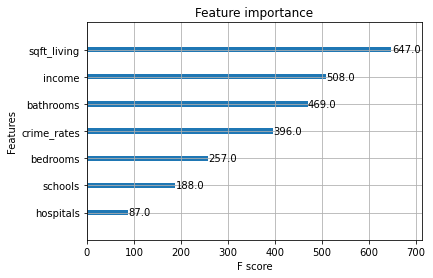

Predicted home price: $485,506.38


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt


# Load data
data_path = r"C:\Users\Shaik Sofiya\Documents\8th sem\task2\house-price-prediction-master\kc_house_data.csv"
data = pd.read_csv(data_path)

# Quick data exploration
print(data.info())
print(data.describe())

# Preprocessing
# Dropping non-relevant columns for simplicity
columns_to_drop = ['id', 'date']
data = data.drop(columns=columns_to_drop)

# Simulating missing features
np.random.seed(42)  # Ensure reproducibility
data['income'] = np.random.randint(30000, 150000, size=len(data))  # Annual income in dollars
data['schools'] = np.random.randint(1, 10, size=len(data))         # Number of schools in the area
data['hospitals'] = np.random.randint(1, 5, size=len(data))        # Number of hospitals in the area
data['crime_rates'] = np.random.uniform(0.1, 5.0, size=len(data))  # Crime rate index

# Handling missing values (if any)
data.fillna(data.median(), inplace=True)

# Selecting features for the model
selected_features = ['income', 'schools', 'hospitals', 'crime_rates', 'sqft_living', 'bedrooms', 'bathrooms']
X = data[selected_features]
y = data["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Feature Importance
xgb.plot_importance(xg_reg)
plt.show()

# Example prediction for a new data point
new_data = pd.DataFrame({
    'income': [75000],
    'schools': [4],
    'hospitals': [2],
    'crime_rates': [1.5],
    'sqft_living': [2000],
    'bedrooms': [3],
    'bathrooms': [2]
})
predicted_price = xg_reg.predict(new_data)
print(f"Predicted home price: ${predicted_price[0]:,.2f}")